In [50]:
%pylab inline
import pandas as pd
import numpy as np
import os
import geopandas as gpd
from geopandas import GeoDataFrame, read_file
from geopandas.tools import sjoin
from shapely.geometry import Point, mapping,shape
import time
import matplotlib.pyplot as plt
from fiona import collection
import json
import requests

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [51]:
# data = pd.read_csv('../data/vzwV3.csv')
data = pd.read_csv('../data/scores.csv')

In [52]:
data.head()

,intersectionID,score
0,1,0.223801
1,2,0.128761
2,3,0.209213
3,4,0.171629
4,5,0.165372


In [53]:
# data.columns.values

In [54]:
ixName = "../data/vz311/intersectionNodes2.geojson"
intersections = gpd.read_file(ixName)

In [55]:
intersections.head()

,NODEID,VIntersect,geometry
0,1,,POINT (-74.25702151185868 40.49414563819848)
1,2,,POINT (-74.24443849259721 40.4922776914055)
2,3,,POINT (-74.25874354305617 40.49704148607953)
3,4,,POINT (-74.25874745972355 40.50270602375195)
4,5,,POINT (-74.25850081677106 40.50810821233416)


In [56]:
intersections.iloc[1,:]['geometry'].x, intersections.iloc[1,:]['geometry'].y

(-74.24443849259721, 40.492277691405505)

In [57]:
# r = requests.get('http://api.geonames.org/findNearestIntersectionJSON?lat=40.50277469652305&lng=-74.25183028565273&username=demo')

In [58]:
# r.json()

In [128]:
req = 'http://api.geonames.org/findNearestIntersectionJSON?lat={}&lng={}&username=demo'

In [90]:
intersections2 = intersections

In [ ]:
intersections2['street1'] = np.nan
intersections2['street2'] = np.nan
intersections2['city'] = np.nan
intersections2['zip'] = np.nan

In [128]:
# intersections2['latitude'] = np.nan
# intersections2['longitude'] = np.nan

In [5]:
# for i in range(len(intersections2)):
#     intersections2['latitude'].iloc[i] = intersections2['geometry'][i].y
#     intersections2['longitude'].iloc[i] = intersections2['geometry'][i].x

In [21]:
intersections2['geometry'][5]

'POINT (-74.25816973865841 40.50886107380881)'

In [60]:
# intersections2 = gpd.read_file('../data/crossStreets.csv')

In [12]:
# intersections2.iloc[7800:8500]

In [130]:
def callGeonames(i):
    arg = req.format(intersections2['geometry'][i].y, intersections2['geometry'][i].x)
    r = requests.get(arg)
    rjson = r.json()
    intersections2['latitude'].iloc[i] = intersections2['geometry'][i].y
    intersections2['longitude'].iloc[i] = intersections2['geometry'][i].x
    try:
        inter = rjson['intersection']
        intersections2['street1'].iloc[i] = inter['street1']
        intersections2['street2'].iloc[i] = inter['street2']
        intersections2['city'].iloc[i] = inter['adminName2']
        intersections2['zip'].iloc[i] = inter['postalcode']
    except:
        pass

In [11]:
# last = 7811

In [17]:
start = time.time()
for i in range(last, len(intersections2)):
    callGeonames(i)
    if i % 50 == 0:
        print i, time.time() - start
    if i % 200 == 0:
#         slimmed = intersections2.drop('geometry', 1)
        intersections2.to_csv('../data/crossStreets.csv')
    last = i

AttributeError: 'str' object has no attribute 'y'

In [121]:
last

7810

In [123]:
# intersections2.to_csv('../data/crossStreets.csv')

In [119]:
intersections2.count()

NODEID        126240
VIntersect    126240
geometry      126240
street1         6032
street2         6032
city            6032
zip             6032
dtype: int64

In [118]:
# intersections2.iloc[7260:8000]

In [29]:
scores = pd.read_csv('../data/scores.csv')

In [35]:
scores.head()

,intersectionID,score
0,1,0.223801
1,2,0.128761
2,3,0.209213
3,4,0.171629
4,5,0.165372


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc91b777e90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc91b0678d0>]], dtype=object)

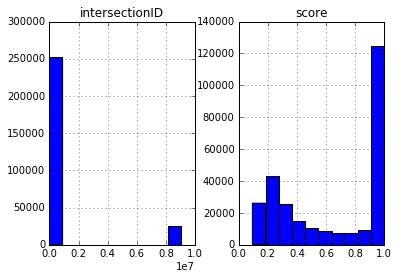

In [49]:
scores.hist()

In [42]:
scores.loc[scores['score']==1].shape

(49625, 2)

In [43]:
scores.loc[scores['score']>0.9].shape

(125601, 2)

In [38]:
scores.shape

(277218, 2)

In [61]:
data.shape

(277218, 2)

In [62]:
intersections.shape

(126240, 3)

In [63]:
data

,intersectionID,score
0,1,0.223801
1,2,0.128761
2,3,0.209213
3,4,0.171629
4,5,0.165372
5,6,0.214167
6,7,0.135801
7,8,0.187640
8,9,0.198972
9,10,0.118286


In [66]:
scoresLocations = pd.merge(scores, intersections, how='left', left_on='intersectionID', right_on='NODEID')

In [67]:
scoresLocations.head()

,intersectionID,score,NODEID,VIntersect,geometry
0,1,0.223801,1,,POINT (-74.25702151185868 40.49414563819848)
1,2,0.128761,2,,POINT (-74.24443849259721 40.4922776914055)
2,3,0.209213,3,,POINT (-74.25874354305617 40.49704148607953)
3,4,0.171629,4,,POINT (-74.25874745972355 40.50270602375195)
4,5,0.165372,5,,POINT (-74.25850081677106 40.50810821233416)


In [82]:
scoresLocations['geometry'][0].coords.x

AttributeError: 'CoordinateSequence' object has no attribute 'x'

In [101]:
scoresLocations['longitude'] = scoresLocations['geometry'].apply(lambda p: p.x)

In [103]:
scoresLocations['latitude'] = scoresLocations['geometry'].apply(lambda p: p.y)

In [104]:
scoresLocations.head()

,intersectionID,score,NODEID,VIntersect,geometry,longitude,latitude
0,1,0.223801,1,,POINT (-74.25702151185868 40.49414563819848),-74.257022,40.494146
1,2,0.128761,2,,POINT (-74.24443849259721 40.4922776914055),-74.244438,40.492278
2,3,0.209213,3,,POINT (-74.25874354305617 40.49704148607953),-74.258744,40.497041
3,4,0.171629,4,,POINT (-74.25874745972355 40.50270602375195),-74.258747,40.502706
4,5,0.165372,5,,POINT (-74.25850081677106 40.50810821233416),-74.258501,40.508108


In [110]:
scoresLocations['range'] = pd.qcut(scoresLocations['score'], 4)

In [111]:
scoresLocations['category'] = pd.qcut(scoresLocations['score'], 4, labels=False)

In [118]:
scoresLocations[scoresLocations['category']==3]

,intersectionID,score,NODEID,VIntersect,geometry,longitude,latitude,range,category
414,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
415,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
416,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
417,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
418,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
419,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
420,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
421,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
422,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3
423,372,1,372,,POINT (-74.23511311133304 40.52091718423947),-74.235113,40.520917,"(0.999997, 1]",3


In [119]:
scoresLocations.to_csv('../data/scoresToMap.csv')

In [120]:
pd.qcut(scoresLocations['score'], 4).value_counts()

(0.757575, 0.999997]     69306
[0.0942769, 0.275044]    69305
(0.275044, 0.757575]     69304
(0.999997, 1]            69303
dtype: int64

In [121]:
scoresLocations[scoresLocations['category']==0]

,intersectionID,score,NODEID,VIntersect,geometry,longitude,latitude,range,category
0,1,0.223801,1,,POINT (-74.25702151185868 40.49414563819848),-74.257022,40.494146,"[0.0942769, 0.275044]",0
1,2,0.128761,2,,POINT (-74.24443849259721 40.4922776914055),-74.244438,40.492278,"[0.0942769, 0.275044]",0
2,3,0.209213,3,,POINT (-74.25874354305617 40.49704148607953),-74.258744,40.497041,"[0.0942769, 0.275044]",0
3,4,0.171629,4,,POINT (-74.25874745972355 40.50270602375195),-74.258747,40.502706,"[0.0942769, 0.275044]",0
4,5,0.165372,5,,POINT (-74.25850081677106 40.50810821233416),-74.258501,40.508108,"[0.0942769, 0.275044]",0
5,6,0.214167,6,,POINT (-74.25816973865841 40.50886107380881),-74.258170,40.508861,"[0.0942769, 0.275044]",0
6,7,0.135801,7,,POINT (-74.25797605089089 40.50779251355441),-74.257976,40.507793,"[0.0942769, 0.275044]",0
7,8,0.187640,8,,POINT (-74.25423514853119 40.50213952842564),-74.254235,40.502140,"[0.0942769, 0.275044]",0
8,9,0.198972,9,,POINT (-74.25393125910766 40.50232143901989),-74.253931,40.502321,"[0.0942769, 0.275044]",0
9,10,0.118286,10,,POINT (-74.25348915972594 40.50235310663089),-74.253489,40.502353,"[0.0942769, 0.275044]",0


In [137]:
size = 50        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
extraScores = scoresLocations.groupby('category', as_index=False).apply(fn)

In [138]:
extraScores['street1'] = np.nan
extraScores['street2'] = np.nan
extraScores['city'] = np.nan
extraScores['zip'] = np.nan

In [139]:
def callGeonames(i, df):
    arg = req.format(df['latitude'][i], df['longitude'][i])
    r = requests.get(arg)
    rjson = r.json()
    try:
        inter = rjson['intersection']
        df['street1'].iloc[i] = inter['street1']
        df['street2'].iloc[i] = inter['street2']
        df['city'].iloc[i] = inter['adminName2']
        df['zip'].iloc[i] = inter['postalcode']
    except:
        pass

In [140]:
start = time.time()
for i in range(len(extraScores)):
    callGeonames(i, extraScores)
#     if i % 50 == 0:
#         print i, time.time() - start
#     if i % 200 == 0:
# #         slimmed = intersections2.drop('geometry', 1)
#         intersections2.to_csv('../data/crossStreets.csv')
#     last = i

In [136]:
displayScores

intersectionID     score   NODEID           VIntersect  \
0 176289           53585  0.211884    53585                        
  205286           72135  0.196037    72135                        
  26103            14731  0.123837    14731                        
  152350           45398  0.256512    45398                        
  271741         9033900  0.243362  9033900                        
  246718          104590  0.209546   104590                        
  124100           36252  0.148337    36252                        
  249982          107492  0.183299   107492                        
  1376              1158  0.184759     1158                        
  23029            13903  0.163625    13903                        
  268897         9030352  0.170882  9030352                        
  1766              1474  0.193990     1474                        
  200244           67119  0.223783    67119                        
  194640           62448  0.260983    62448                        
  6934              5824  0.227651     5824                        
1 191199           60323  0.717671    60323                        
  29118            15429  0.702251    15429                        
  140968           42381  0.554560    42381                        
  5199              4370  0.544453     4370                        
  226635           89571  0.678052    89571                        
  170861           51090  0.329805    51090                        
  246273          104188  0.629464   104188                        
  5620              4703  0.476204     4703                        
  225137           88365  0.565377    88365                        
  192537           61222  0.583534    61222                        
  252111         9000460  0.383591  9000460                        
  203622           70362  0.332384    70362                        
  246297          104220  0.346703   104220                        
  239798           99053  0.352012    99053                        
  194787           62557  0.630006    62557                        
2 94169            26464  0.998358    26464                        
  90269            25420  0.999583    25420                        
  131527           39371  0.999963    39371                        
  26560            14874  0.989371    14874                        
  39612            18123  0.963720    18123                        
  156316           46726  0.978505    46726                        
  140134           42056  0.992307    42056                        
  233492           95150  0.999988    95150                        
  173257           52455  0.996797    52455                        
  180176           55039  0.999762    55039                        
  17729            12522  0.878426    12522                        
  116116           32608  0.778103    32608                        
  97452            26963  0.862120    26963                        
  24180            14109  0.999839    14109                        
  111115           30442  0.999747    30442                        
3 130061           38818  1.000000    38818                        
  245965          103969  0.999997   103969                        
  64894            21410  1.000000    21410                        
  5122              4317  1.000000     4317                        
  57878            20911  1.000000    20911                        
  33038            16472  1.000000    16472                        
  11690             9171  1.000000     9171                        
  86757            24163  1.000000    24163                        
  31044            15876  1.000000    15876                        
  75186            22612  1.000000    22612                        
  83146            23633  1.000000    23633                        
  181907           55516  1.000000    55516                        
  9992              8180  1.000000     8180                       

In [150]:
displayScores[~pd.isnull(displayScores['zip'])][displayScores['zip']!='']

/home/afair/miniconda2/envs/cusp/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


intersectionID     score   NODEID           VIntersect  \
0 271741         9033900  0.243362  9033900                        
  124100           36252  0.148337    36252                        
  1376              1158  0.184759     1158                        
  1766              1474  0.193990     1474                        
  200244           67119  0.223783    67119                        
1 140968           42381  0.554560    42381                        
  5199              4370  0.544453     4370                        
  226635           89571  0.678052    89571                        
  246273          104188  0.629464   104188                        
  5620              4703  0.476204     4703                        
  225137           88365  0.565377    88365                        
  192537           61222  0.583534    61222                        
  252111         9000460  0.383591  9000460                        
  203622           70362  0.332384    70362                        
2 94169            26464  0.998358    26464                        
  90269            25420  0.999583    25420                        
  131527           39371  0.999963    39371                        
  26560            14874  0.989371    14874                        
  39612            18123  0.963720    18123                        
  140134           42056  0.992307    42056                        
  173257           52455  0.996797    52455                        
  180176           55039  0.999762    55039                        
  17729            12522  0.878426    12522                        
  116116           32608  0.778103    32608                        
  97452            26963  0.862120    26963                        
  24180            14109  0.999839    14109                        
  111115           30442  0.999747    30442                        
3 130061           38818  1.000000    38818                        
  64894            21410  1.000000    21410                        
  5122              4317  1.000000     4317                        
  57878            20911  1.000000    20911                        
  33038            16472  1.000000    16472                        
  11690             9171  1.000000     9171                        
  86757            24163  1.000000    24163                        
  31044            15876  1.000000    15876                        
  75186            22612  1.000000    22612                        
  83146            23633  1.000000    23633                        
  181907           55516  1.000000    55516                        
  9992              8180  1.000000     8180                        
  79852            23096  1.000000    23096                        
  260187         9009109  1.000000  9009109  VirtualIntersection   

                                              geometry  longitude   latitude  \
0 271741  POINT (-73.92826759238305 40.81884483910343) -73.928268  40.818845   
  124100  POINT (-73.79294589056427 40.67205891029501) -73.792946  40.672059   
  1376    POINT (-74.21586064684669 40.53582275374594) -74.215861  40.535823   
  1766    POINT (-74.19940629884407 40.54109650190232) -74.199406  40.541097   
  200244  POINT (-73.81988486046825 40.70020801226444) -73.819885  40.700208   
1 140968   POINT (-73.91083464233361 40.7796348261962) -73.910835  40.779635   
  5199    POINT (-74.14752919130399 40.53629795515928) -74.147529  40.536298   
  226635  POINT (-73.87173060312368 40.66657221488494) -73.871731  40.666572   
  246273  POINT (-73.84166517434075 40.72065917939852) -73.841665  40.720659   
  5620    POINT (-74.15033131560777 40.56891285897208) -74.150331  40.568913   
  225137  POINT (-73.94967902257669 40.67856596871905) -73.949679  40.678566   
  192537  POINT (-73.74564189608893 40.71595755226788) -73.745642  40.715958   
  252111  POINT (-74.00217319937862 40.74933596659542) -74.002173  40.749336   
  203622  POINT (-74.183013335255

In [152]:
finalScores = extraScores[~pd.isnull(extraScores['zip'])][extraScores['zip']!='']

In [153]:
finalScores.shape

(152, 13)

In [154]:
size = 10        # sample size
replace = False  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
tableScores = finalScores.groupby('category', as_index=False).apply(fn)

In [155]:
tableScores

intersectionID     score   NODEID           VIntersect  \
0 0 185231           56736  0.205862    56736                        
    201205           68093  0.160773    68093                        
    253779         9002181  0.150419  9002181                        
    226751           89687  0.251578    89687                        
    205631           72483  0.262625    72483                        
    9299              7703  0.266396     7703                        
    7474              6363  0.217725     6363                        
    264494         9014358  0.274182  9014358                        
    202720           69535  0.256838    69535  VirtualIntersection   
    211560           78338  0.260637    78338                        
1 1 157010           46881  0.310057    46881                        
    203504           70269  0.327595    70269                        
    186225           57499  0.400743    57499                        
    134615           40725  0.506514    40725                        
    97335            26946  0.575074    26946                        
    211792           78561  0.423182    78561                        
    208375           75225  0.439359    75225                        
    195358           62874  0.501464    62874                        
    54727            20632  0.376355    20632                        
    92296            26106  0.394595    26106                        
2 2 94083            26451  0.999945    26451                        
    101920           27772  0.919518    27772                        
    72035            22431  0.844333    22431                        
    178281           54267  0.871300    54267                        
    41114            18377  0.999520    18377                        
    146524           43573  0.997747    43573                        
    39544            18093  0.881204    18093                        
    78956            22927  0.998407    22927                        
    156191           46705  0.999988    46705                        
    41020            18361  0.995845    18361                        
3 3 79721            23077  1.000000    23077                        
    36207            17371  1.000000    17371                        
    42259            18546  1.000000    18546                        
    83466            23662  1.000000    23662                        
    18557            12842  1.000000    12842                        
    53415            20507  1.000000    20507                        
    124286           36317  1.000000    36317                        
    114104           31863  1.000000    31863                        
    237140           97391  1.000000    97391                        
    54585            20601  1.000000    20601                        

                                                geometry  longitude  \
0 0 185231  POINT (-73.80295830255268 40.79640959085195) -73.802958   
    201205  POINT (-73.77134951482471 40.71801518537968) -73.771350   
    253779  POINT (-73.94723681373554 40.81183188069613) -73.947237   
    226751   POINT (-73.87888493975052 40.7635509953293) -73.878885   
    205631  POINT (-73.92735882695069 40.74062164186007) -73.927359   
    9299    POINT (-74.09257214743397 40.57567191340565) -74.092572   
    7474    POINT (-74.13861274082963 40.62177287601411) -74.138613   
    264494  POINT (-73.81570207947533 40.84251972112432) -73.815702   
    202720    POINT (-73.939383742156 40.73465490153487) -73.939384   
    211560  POINT (-73.99684295976657 40.72534783868771) -73.996843   
1 1 157010   POINT (-73.87602197508794 40.7703120011718) -73.876022   
    203504  POINT (-74.12143912176977 40.57921146471285) -74.121439   
    186225  POINT (-73.82415670820217 40.82846949238038) -73.824157   
    134615  POINT (-73.93244155246836 40.72381337752748) -73.932442   
    97335   POINT (-73.92856850069093 40.68050658397172) -73.928569   
    2

In [187]:
presentScores = tableScores[['intersectionID', 'category', 'score', 'street1', 'street2', 'city', 'zip', 'latitude', 'longitude']]

In [188]:
presentScores

intersectionID  category     score         street1  \
0 0 185231           56736         0  0.205862    Riverside Dr   
    201205           68093         0  0.160773   Palo Alto Ave   
    253779         9002181         0  0.150419      W 129th St   
    226751           89687         0  0.251578    Astoria Blvd   
    205631           72483         0  0.262625         38th St   
    9299              7703         0  0.266396      Grimsby St   
    7474              6363         0  0.217725     College Ave   
    264494         9014358         0  0.274182      Lucerne St   
    202720           69535         0  0.256838  Greenpoint Ave   
    211560           78338         0  0.260637        Broadway   
1 1 157010           46881         1  0.310057    Ditmars Blvd   
    203504           70269         1  0.327595      Beacon Ave   
    186225           57499         1  0.400743   E Tremont Ave   
    134615           40725         1  0.506514     Lombardy St   
    97335            26946         1  0.575074     Chauncey St   
    211792           78561         1  0.423182      E 120th St   
    208375           75225         1  0.439359         21st St   
    195358           62874         1  0.501464    Hillside Ave   
    54727            20632         1  0.376355   Washington Pl   
    92296            26106         1  0.394595      Albany Ave   
2 2 94083            26451         2  0.999945       E 96th St   
    101920           27772         2  0.919518    Flushing Ave   
    72035            22431         2  0.844333  Greenpoint Ave   
    178281           54267         2  0.871300      E 235th St   
    41114            18377         2  0.999520      Rogers Ave   
    146524           43573         2  0.997747      W 174th St   
    39544            18093         2  0.881204       E 14th St   
    78956            22927         2  0.998407       E 67th St   
    156191           46705         2  0.999988        34th Ave   
    41020            18361         2  0.995845      Tilden Ave   
3 3 79721            23077         3  1.000000        York Ave   
    36207            17371         3  1.000000      Ocean Pkwy   
    42259            18546         3  1.000000      Carroll St   
    83466            23662         3  1.000000        Park Ave   
    18557            12842         3  1.000000         86th St   
    53415            20507         3  1.000000        Broadway   
    124286           36317         3  1.000000        150th St   
    114104           31863         3  1.000000   Rockaway Blvd   
    237140           97391         3  1.000000      Cohancy St   
    54585            20601         3  1.000000        Broadway   

                    street2      city    zip   latitude  longitude  
0 0 185231         159th St    Queens  11357  40.796410 -73.802958  
    201205       Palermo St    Queens  11423  40.718015 -73.771350  
    253779          7th Ave  New York  10027  40.811832 -73.947237  
    226751          90th St    Queens  11369  40.763551 -73.878885  
    205631         48th Ave    Queens  11101  40.740622 -73.927359  
    9299         Hunter Ave  Richmond  10306  40.575672 -74.092572  
    7474        Marianne St  Richmond  10302  40.621773 -74.138613  
    264494         Radio Dr     Bronx  10465  40.842520 -73.815702  
    202720     Railroad Ave    Queens  11101  40.734655 -73.939384  
    211560     W Houston St  New York  10012  40.725348 -73.996843  
1 1 157010          94th St    Queens  11369  40.770312 -73.876022  
    203504       Walden Ave  Richmond  10306  40.579211 -74.121439  
    186225         Scott Pl     Bronx  10465  40.828469 -73.824157  
    134615      Stewart Ave     Kings  11222  40.723813 -73.932442  
    97335          Reid Ave     Kings  11233  40.680507 -73.928569  
    211792          2nd Ave  New York  10035  40.799529 -73.935607  
    208375         43rd Ave    Queens  11101  40.750121 -73.946118  
    195358         265th St    Queens  11004  40.738319 -73.703

In [189]:
presentScores.columns.values

array(['intersectionID', 'category', 'score', 'street1', 'street2', 'city',
       'zip', 'latitude', 'longitude'], dtype=object)

In [190]:
niceScores = presentScores.set_index('intersectionID').sort(['category'], ascending=False)

/home/afair/miniconda2/envs/cusp/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [191]:
niceScores['risk group'] = ''

In [192]:
niceScores['risk group'][niceScores['category']==3] = 'Extreme'
niceScores['risk group'][niceScores['category']==2] = 'High'
niceScores['risk group'][niceScores['category']==1] = 'Moderate'
niceScores['risk group'][niceScores['category']==0] = 'Low'

/home/afair/miniconda2/envs/cusp/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/afair/miniconda2/envs/cusp/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/afair/miniconda2/envs/cusp/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/h

In [193]:
niceScores

,category,score,street1,street2,city,zip,latitude,longitude,risk group
intersectionID,,,,,,,,,
20601,3,1.000000,Broadway,Bleecker St,New York,10012,40.726527,-73.995844,Extreme
12842,3,1.000000,86th St,Bay Pkwy,Kings,11214,40.601950,-73.993811,Extreme
23077,3,1.000000,York Ave,E 73rd St,New York,10021,40.767536,-73.953251,Extreme
18546,3,1.000000,Carroll St,7th Ave,Kings,11215,40.673199,-73.976322,Extreme
23662,3,1.000000,Park Ave,E 96th St,New York,10128,40.786549,-73.952551,Extreme
17371,3,1.000000,Ocean Pkwy,Ave H,Kings,11230,40.628929,-73.971366,Extreme
20507,3,1.000000,Broadway,Spring St,New York,10012,40.723021,-73.998812,Extreme
36317,3,1.000000,150th St,N Conduit Ave,Queens,11436,40.666841,-73.789410,Extreme
31863,3,1.000000,Rockaway Blvd,Woodhaven Blvd,Queens,11417,40.680700,-73.844645,Extreme


In [194]:
cols = niceScores.columns.tolist()

In [195]:
cols

['category',
 'score',
 'street1',
 'street2',
 'city',
 'zip',
 'latitude',
 'longitude',
 'risk group']

In [196]:
newCols = ['risk group', 'score', 'street1', 'street2', 'city', 'zip', 'latitude', 'longitude']

In [197]:
noMoreScores = niceScores[newCols]

In [199]:
noMoreScores.to_csv('../data/scoresTable.csv')